# Lecture 6 :  Average Word2Vec

https://www.youtube.com/watch?v=Qbd7U9F0QQ8&list=PLKnIA16_RmvZo7fp5kkIth6nRTeQQsjfX&index=6

Text classification : LSTM - https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

### Types of text classification:


1. binary  - 2 classes eg: mail spam classifier


2. multiclass - more than 2 classes eg : movie review classification


3. multilayer - one input multiple output. eg : single news has three types

### Pipeline

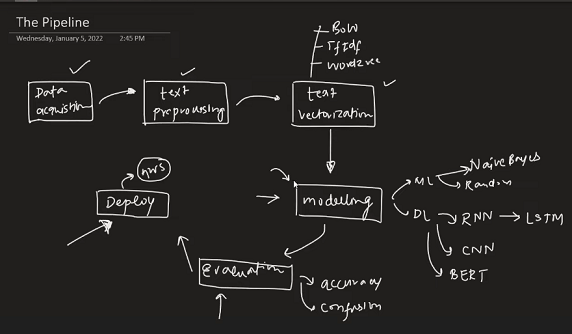

### Approaches

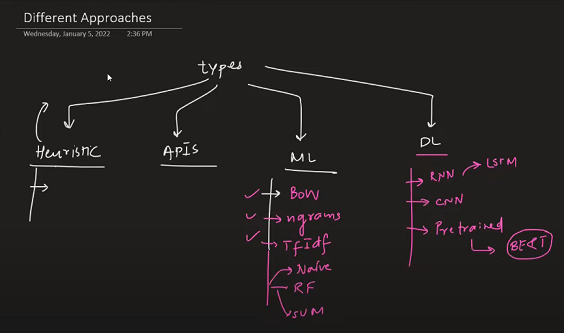

## 1. Machine learning approach 

### Using Bag of Words and n-grams

In [55]:
import pandas as pd
import numpy as np

In [56]:
temp_df = pd.read_csv(r"D:\NLP\datasets\IMDB Dataset.csv")
temp_df.shape

(50000, 2)

In [57]:
temp_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [58]:
temp_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [59]:
df= temp_df.sample(10000)
df.reset_index(inplace=True)
df.shape

(10000, 3)

In [60]:
df['sentiment'].value_counts()

negative    5011
positive    4989
Name: sentiment, dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df['review'][1]

'A good film with--for its time--an intense, sprawling, rather dark story somewhat reminiscent of John Ford\'s "The Searchers" though not so brutal. The story starts fast and doesn\'t let up, with several scenes of really good dialog between (Stewart\'s) Jeff Webster, Ronda Castle and Sheriff Gannon. This film is in some ways reminiscent of "Bend of the River" (1952), also a Mann-Stewart work, but I found it far less sentimental and more interesting. There are a few caveats: a too-quickly wrapped up (and rather sentimental) ending; 24-year-old Corrine Calvert is not very convincing as a naive French teenager, and of course the film takes place in the Mythic West, a land of fable where the real laws of nations and physics don\'t apply. But these are trivial concerns. James Stewart is surprisingly good as a dark, disengaged man who thinks he cares for no one but himself, and the mountain scenery can\'t be beat. A fine Western costume drama.'

In [63]:
# Basic Preprocessing

# Remove tags

# Lowercase

# remove stopwords

In [64]:
import re

#### removing tags : 

In [65]:
def remove_tags(text):
    cleaned_text =re.sub(re.compile('<.*?>'),'',text) 
    return cleaned_text

In [66]:
df['review'] = df['review'].apply(remove_tags)
df['review']

0       A pig-tailed Linnea Quigley drinks milk, strip...
1       A good film with--for its time--an intense, sp...
2       Holy freaking God all-freaking-mighty. This mo...
3       The problem with this series is that it is too...
4       and it's only January, still I'm sure of it!By...
                              ...                        
9995    Goldeneye will always go down as one of thee m...
9996    Bloody marvelous. Recommended by a friend who ...
9997    Never when I was a child did I love any movie ...
9998    The Railway Children, at least this 1970 movie...
9999    It may have not been up for academy awards and...
Name: review, Length: 10000, dtype: object

#### lowercasing

In [67]:
df['review'] = df['review'].apply(lambda x : x.lower())
df['review']

0       a pig-tailed linnea quigley drinks milk, strip...
1       a good film with--for its time--an intense, sp...
2       holy freaking god all-freaking-mighty. this mo...
3       the problem with this series is that it is too...
4       and it's only january, still i'm sure of it!by...
                              ...                        
9995    goldeneye will always go down as one of thee m...
9996    bloody marvelous. recommended by a friend who ...
9997    never when i was a child did i love any movie ...
9998    the railway children, at least this 1970 movie...
9999    it may have not been up for academy awards and...
Name: review, Length: 10000, dtype: object

#### remove stopwords

In [68]:
for i in range(df['review'].shape[0]):
    print(len(df['review'][i]),end=" ")

1623 946 760 681 2148 2562 1320 2710 806 563 2270 1757 1320 510 981 869 4769 884 2208 766 1292 755 585 1150 623 876 974 1197 1550 966 695 716 622 1623 895 886 800 270 506 1646 842 1128 853 1383 951 608 737 1101 790 1053 747 2099 2063 667 857 1139 2354 1177 686 893 1126 3266 3463 221 647 2043 2730 1787 737 696 2266 1172 418 826 614 1221 2021 1496 905 497 1140 3019 489 1279 215 236 700 1194 486 708 582 3819 352 969 3858 1285 3698 1511 803 1550 858 1991 2523 1778 1890 1537 1874 1865 860 722 724 4311 856 3337 2807 2682 1026 2221 775 678 2611 2780 2279 1369 1261 831 1276 976 917 238 2217 604 856 1480 1625 1898 630 1001 1031 1914 337 718 847 750 283 2379 630 873 552 892 597 674 1031 1890 823 768 781 674 754 841 1831 981 3496 765 1005 585 670 897 670 1302 682 711 1135 1391 1122 1431 1756 924 713 1092 147 944 1737 722 862 532 620 3833 1810 1620 579 907 2384 647 1264 732 700 649 870 830 2553 684 4182 818 1191 4379 795 1525 633 322 892 1745 2657 4113 2010 1478 1405 801 646 2019 450 867 951 870 1

In [69]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x : " ".join(x))

In [70]:
df['review']

0       pig-tailed linnea quigley drinks milk, strips ...
1       good film with--for time--an intense, sprawlin...
2       holy freaking god all-freaking-mighty. movie b...
3       problem series real. watching amazon "unbox" f...
4       january, still i'm sure it!by far among worst ...
                              ...                        
9995    goldeneye always go one thee legendary games v...
9996    bloody marvelous. recommended friend knew like...
9997    never child love movie one. would love it. wat...
9998    railway children, least 1970 movie version wri...
9999    may academy awards admittedly, pretty cheesy, ...
Name: review, Length: 10000, dtype: object

In [71]:
for i in range(df['review'].shape[0]):
    print(len(df['review'][i]),end=" ")

1140 711 520 441 1346 1817 899 2002 592 399 1592 1281 947 337 616 602 3095 611 1813 476 919 467 406 768 411 571 659 803 1138 624 497 431 458 1142 657 546 589 179 373 1137 582 755 552 935 727 411 465 740 536 781 528 1399 1397 426 676 769 1613 801 419 596 805 2185 2419 149 384 1331 1828 1433 521 496 1464 782 323 564 404 846 1350 1052 558 383 830 2062 314 843 155 165 470 740 337 464 380 2697 243 662 2755 881 2497 992 513 1169 540 1399 1675 1291 1324 1034 1418 1254 545 447 530 2788 537 2250 1859 1877 720 1354 553 434 1890 1944 1581 930 872 571 890 693 712 171 1414 403 639 890 1071 1498 453 688 641 1378 205 513 516 456 196 1662 455 606 371 572 418 404 727 1219 652 447 480 443 506 578 1205 658 2399 525 684 405 479 583 394 925 420 413 801 997 780 1033 1161 654 520 773 119 656 1372 441 570 370 409 2785 1304 1088 444 563 1690 454 868 501 483 397 581 524 1691 514 3086 577 814 3312 590 1074 457 211 587 1171 1902 2809 1641 1032 982 558 409 1471 287 567 631 629 649 451 493 701 1034 3561 416 727 372

In [72]:
X = df['review']
y = df['sentiment']

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 1, 0, ..., 1, 1, 1])

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000,), (8000,), (2000,), (2000,))

In [78]:
X_train

8680    george zucco fine actor, often playing gimlet-...
6495    goofy griswalds win t.v. game show "pig poke" ...
1       good film with--for time--an intense, sprawlin...
4264    reading fool love drama class mine, looking fo...
9111    nepotism capitol world comes another junk flic...
                              ...                        
726     first heard movie "flashback weekend" chicago ...
4071    simply put, simplistic one dimensional film. t...
6725    movie brilliant, srk's acting amazing, end inc...
9102    released film caused sensation. watched thrill...
4079    enjoyed movie much. certainly leave audience w...
Name: review, Length: 8000, dtype: object

#### Applying Bag of Words

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
cv = CountVectorizer()

In [91]:
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow= cv.transform(X_test).toarray()

In [92]:
X_train_bow.shape

(8000, 48025)

#### Using GaissianNB

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [94]:
gnb.fit(X_train_bow, y_train)

GaussianNB()

In [95]:
y_pred = gnb.predict(X_test_bow)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [97]:
accuracy_score(y_test,y_pred)

0.6485

In [98]:
confusion_matrix(y_test,y_pred)

array([[741, 261],
       [442, 556]], dtype=int64)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1002
           1       0.68      0.56      0.61       998

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



#### using RandomForest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf = RandomForestClassifier()

In [104]:
rf.fit(X_train_bow,y_train)
y_pred= rf.predict(X_test_bow)

In [105]:
accuracy_score(y_test,y_pred)

0.846

In [106]:
confusion_matrix(y_test,y_pred)

array([[856, 146],
       [162, 836]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1002
           1       0.85      0.84      0.84       998

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



#### rather than taking all words, we will take most frequent 3000 words

In [108]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

In [110]:
y_test

array([1, 1, 1, ..., 0, 0, 1])

In [112]:
rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)

accuracy_score(y_test,y_pred)

0.841

In [113]:
confusion_matrix(y_test,y_pred)

array([[861, 141],
       [177, 821]], dtype=int64)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1002
           1       0.85      0.82      0.84       998

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



#### using n-grams - bigrams

In [115]:
cv = CountVectorizer(ngram_range=(1,2), max_features=5000) #  using max_features as using all features , the data will overflow and not run

X_train_bow = cv.fit_transform(X_train)
X_test_bow = cv.transform(X_test)


rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)

accuracy_score(y_test, y_pred)

0.8435

In [116]:
confusion_matrix(y_test,y_pred)

array([[854, 148],
       [165, 833]], dtype=int64)

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1002
           1       0.85      0.83      0.84       998

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



### using tf-idf

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
tfidf = TfidfVectorizer()

In [120]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [122]:
rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.8385

In [123]:
confusion_matrix(y_test,y_pred)

array([[854, 148],
       [175, 823]], dtype=int64)

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1002
           1       0.85      0.82      0.84       998

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



### using word2vec

#### pretrained model

In [125]:
import gensim

In [126]:
from gensim.models import Word2Vec,KeyedVectors

In [127]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True,limit=500000)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

#### creating own model

### Average word2vec

In [128]:
import numpy as np
import pandas as pd

In [132]:
df['sentiment']

0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
9995    positive
9996    positive
9997    positive
9998    positive
9999    positive
Name: sentiment, Length: 10000, dtype: object

In [133]:
df['review']

0       pig-tailed linnea quigley drinks milk, strips ...
1       good film with--for time--an intense, sprawlin...
2       holy freaking god all-freaking-mighty. movie b...
3       problem series real. watching amazon "unbox" f...
4       january, still i'm sure it!by far among worst ...
                              ...                        
9995    goldeneye always go one thee legendary games v...
9996    bloody marvelous. recommended friend knew like...
9997    never child love movie one. would love it. wat...
9998    railway children, least 1970 movie version wri...
9999    may academy awards admittedly, pretty cheesy, ...
Name: review, Length: 10000, dtype: object

In [130]:
import gensim

In [131]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [134]:
story = []
for lines in df['review']:
    raw_sent = sent_tokenize(lines)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [135]:
model = gensim.models.Word2Vec(
window=10,
min_count=2)

In [136]:
model.build_vocab(story)

In [137]:
model.train(story, total_examples=model.corpus_count,epochs=100)

(116976594, 123706800)

In [138]:
len(model.wv.index_to_key)

31756

In [139]:
def document_vector(lines):
    # remove out-of-vocabulary words
    lines = [word for word in lines.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[lines],axis=0)

In [141]:
document_vector(df['review'].values[0])

array([ 0.2502003 ,  0.20449662, -0.23301238,  0.01509894,  0.2836957 ,
        0.42965803,  0.13932827, -0.27608937, -0.6384321 ,  0.23604318,
       -0.36784783,  0.1186508 , -0.22462344,  0.41516623, -0.10002826,
       -0.04943991, -0.11040045,  0.1272121 , -0.20175721, -0.05696547,
        0.42711473, -0.36772642, -0.09201933, -0.04767257, -0.08047704,
       -0.02204141,  0.16713755,  0.29837978,  0.1471447 , -0.49459198,
       -0.5651468 , -0.32040775, -0.09988171, -0.17679751,  0.14609164,
       -0.1394855 ,  0.04155511, -0.19769035, -0.39958242,  0.6346615 ,
       -0.2943101 , -0.03412718,  0.39014357,  0.04038767,  0.5448031 ,
        0.12695019,  0.16411841,  0.5364442 , -0.5157948 , -0.32830325,
        0.02364094,  0.19234301, -0.2092596 , -0.04180001, -0.04084877,
       -0.2777494 , -0.15207502,  0.04245254,  0.39735672,  0.44351214,
       -0.02879222, -0.42680743, -0.12176824, -0.1305686 ,  0.60843414,
        0.19742002,  0.03768687, -0.47997427, -0.07245716, -0.63

In [142]:
from tqdm import tqdm

In [143]:
X = []

for lines in tqdm(df['review'].values):
    X.append(document_vector(lines))

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:59<00:00, 27.78it/s]


In [144]:
X = np.array(X)

In [145]:
X.shape # 100 dimension data

(10000, 100)

In [146]:
X[0]

array([ 0.2502003 ,  0.20449662, -0.23301238,  0.01509894,  0.2836957 ,
        0.42965803,  0.13932827, -0.27608937, -0.6384321 ,  0.23604318,
       -0.36784783,  0.1186508 , -0.22462344,  0.41516623, -0.10002826,
       -0.04943991, -0.11040045,  0.1272121 , -0.20175721, -0.05696547,
        0.42711473, -0.36772642, -0.09201933, -0.04767257, -0.08047704,
       -0.02204141,  0.16713755,  0.29837978,  0.1471447 , -0.49459198,
       -0.5651468 , -0.32040775, -0.09988171, -0.17679751,  0.14609164,
       -0.1394855 ,  0.04155511, -0.19769035, -0.39958242,  0.6346615 ,
       -0.2943101 , -0.03412718,  0.39014357,  0.04038767,  0.5448031 ,
        0.12695019,  0.16411841,  0.5364442 , -0.5157948 , -0.32830325,
        0.02364094,  0.19234301, -0.2092596 , -0.04180001, -0.04084877,
       -0.2777494 , -0.15207502,  0.04245254,  0.39735672,  0.44351214,
       -0.02879222, -0.42680743, -0.12176824, -0.1305686 ,  0.60843414,
        0.19742002,  0.03768687, -0.47997427, -0.07245716, -0.63

In [147]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [150]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 100), (2000, 100), (8000,), (2000,))

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [152]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.808

### Practical advise:


- Use ensemble techniques



- Use Heuristic features


- first use ML models then jump to Deep learning models


- Avoid Imbalanced data


- 